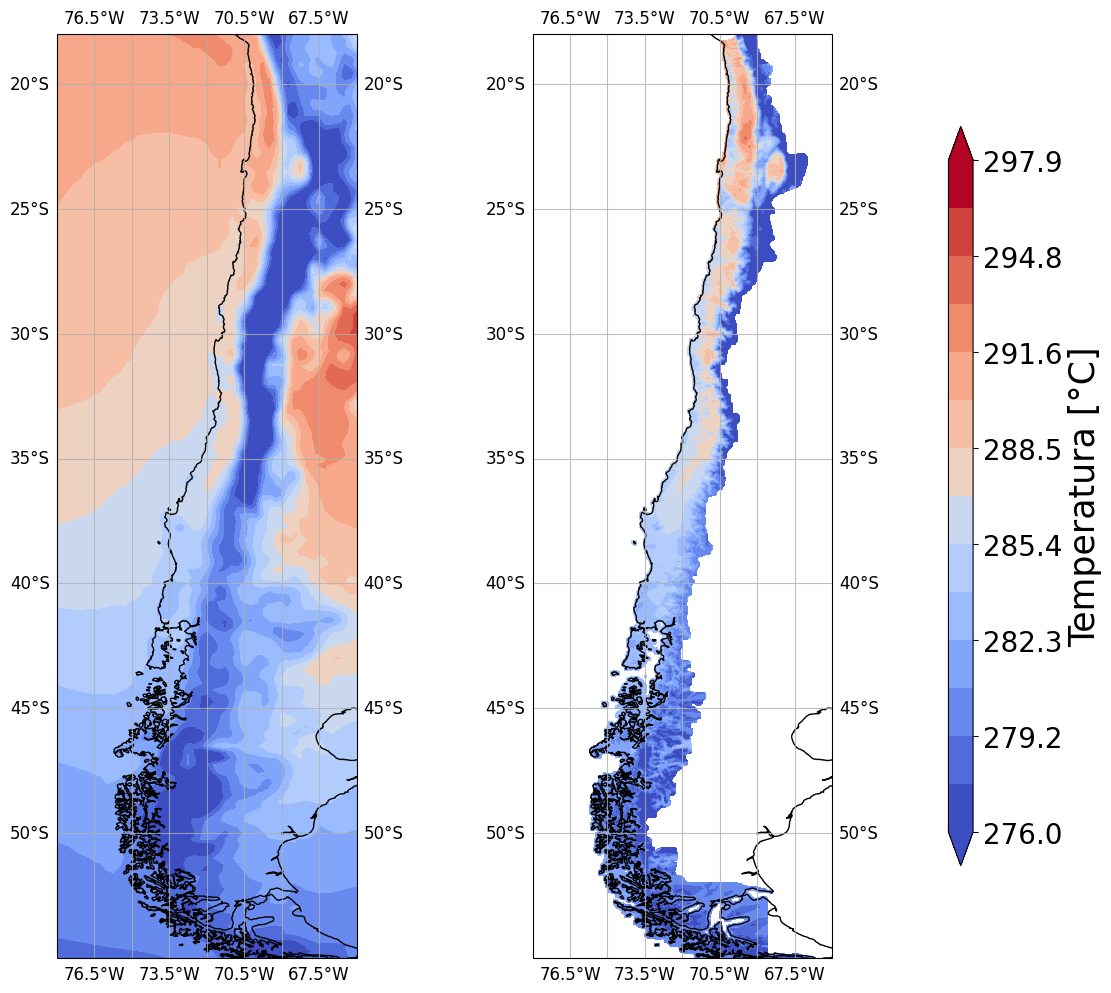

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import cartopy.feature as cfeature
from matplotlib.ticker import FuncFormatter
import cmaps as cmaps



months = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", 
          "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]


### Formato personalizado de valores en el colorbar
def format_custom(x, pos):
   
    if x == 0:  
        return "0"
    elif abs(x) >= 1: 
        return "{:.1f}".format(x)
    elif abs(x) < 0.01:  
        return "{:.3f}".format(x)
    else:
        return "{:.2f}".format(x)
    
path = os.getcwd()
current_dir = os.path.abspath(path) 
data_dir = os.path.join(current_dir, "gridded_data")

    
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 12), subplot_kw={'projection': ccrs.PlateCarree()})

axs = axs.flatten()
    
t2m_data_dir = os.path.join(data_dir,  "ERA5", "processed", "mean", f"2m_temperature_year_mean.nc")
data_t2m = xr.open_dataset(t2m_data_dir, decode_times=True, decode_timedelta=True)

lat = data_t2m.latitude.values
lon = data_t2m.longitude.values
X, Y = np.meshgrid(lon, lat)

cr2met_dir = os.path.join(data_dir,  "CR2MET", "processed", "mean", f"CR2MET_tmean_2022_yearly_mean.nc")
data_cr2met = xr.open_dataset(cr2met_dir, decode_times=True, decode_timedelta=True)

lat2 = data_cr2met.lat.values
lon2 = data_cr2met.lon.values
X2, Y2 = np.meshgrid(lon2, lat2)


#### se genera linspace con 15 valores equiespaciados, entre los percentiles 5 y 95 de temperatura
levels = [
        np.linspace( 
                    data_t2m["t2m"][:,:,:].quantile(0.05).values,
                    data_t2m["t2m"][:,:,:].quantile(0.95).values,
                    15
                    )
    ]


for j in range(2):

    ### Se define región
    axs[j].set_extent([-78, -66, -55, -18], crs=ccrs.PlateCarree())
    axs[j].coastlines()


        
    gl = axs[j].gridlines( draw_labels=True ,alpha=0.8)

    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    
contour1 = axs[0].contourf(X, Y, data_t2m["t2m"][0,:,:],levels=levels[0], transform=ccrs.PlateCarree(), extend="both", cmap = cmaps.MPL_coolwarm.to_seg(N=15))
contour2 = axs[1].contourf(X2, Y2, data_cr2met["tmean"][0,:,:] +273.15,levels=levels[0], transform=ccrs.PlateCarree(), extend="both", cmap = cmaps.MPL_coolwarm.to_seg(N=15))

cbar1 = fig.colorbar(contour1, ax=axs[:], location='right', shrink=0.8, aspect=30, pad=0.1) 
cbar1.set_label(f"Temperatura [°C]", fontsize=25)
cbar1.ax.tick_params(  labelsize=20 )  
cbar1.formatter = FuncFormatter(format_custom)
cbar1.update_ticks()

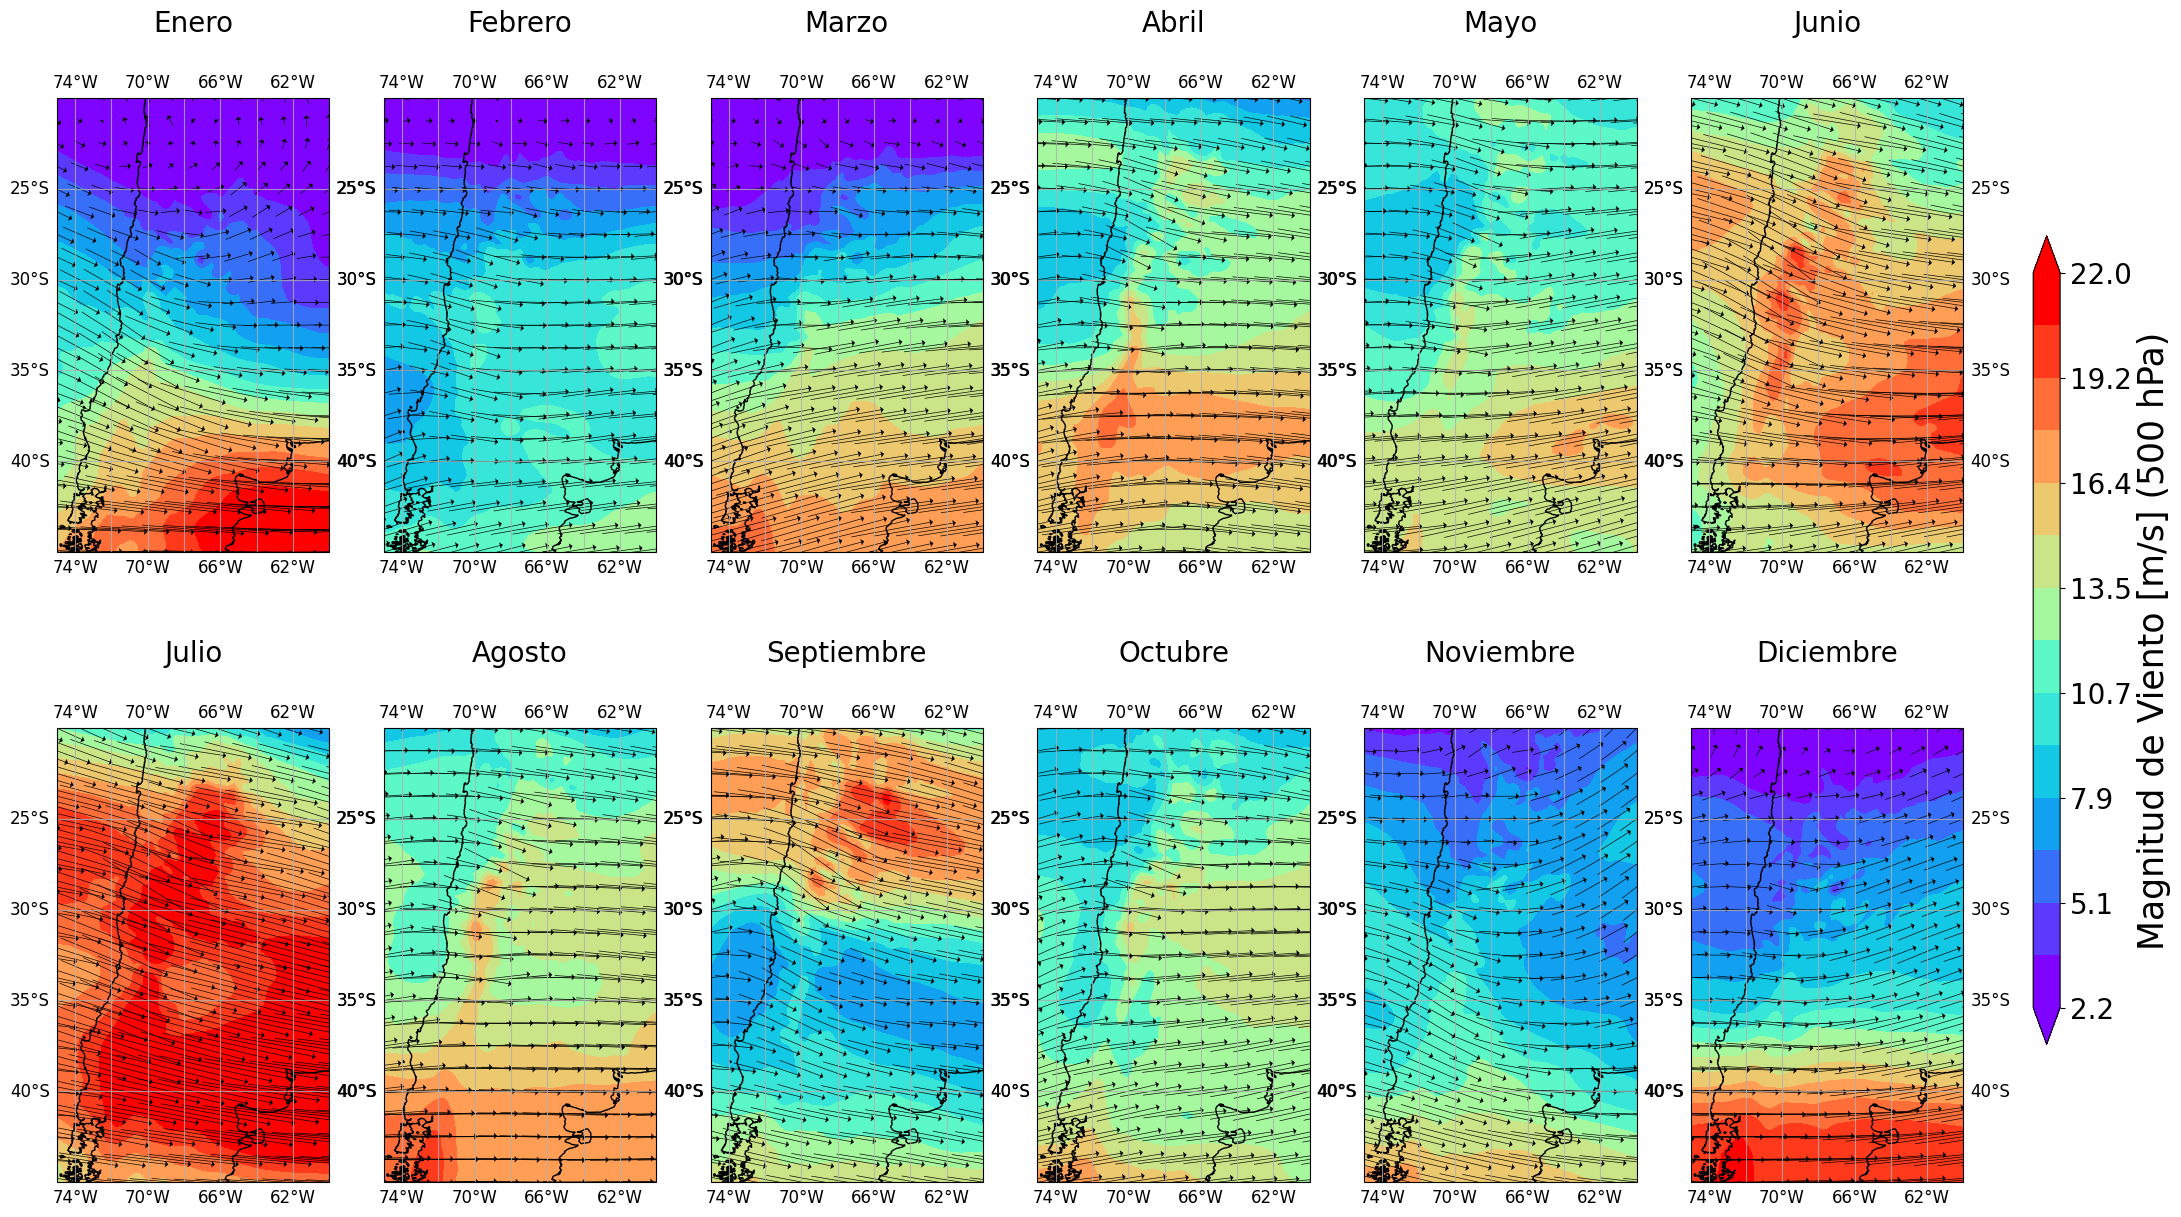

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import cartopy.feature as cfeature
from matplotlib.ticker import FuncFormatter
import cmaps as cmaps

months = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", 
          "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

def format_custom(x, pos):
   
    if x == 0:  
        return "0"
    elif abs(x) >= 1: 
        return "{:.1f}".format(x)
    elif abs(x) < 0.01:  
        return "{:.3f}".format(x)
    else:
        return "{:.2f}".format(x)
    
path = os.getcwd()
current_dir = os.path.abspath(path) 
data_dir = os.path.join(current_dir, "gridded_data", "ERA5", "processed", "mean")

    
fig, axs = plt.subplots(nrows = 2, ncols = 6, figsize=(30, 15), subplot_kw={'projection': ccrs.PlateCarree()})

### Con este comando los axs pasan de tener dimensión 2x6 a una lista de 12
axs = axs.flatten()
    
u_data_dir = os.path.join(data_dir, f"u_component_of_wind_{500}_monthly_mean.nc")
data_u = xr.open_dataset(u_data_dir, decode_times=True, decode_timedelta=True)

v_data_dir = os.path.join(data_dir, f"v_component_of_wind_{500}_monthly_mean.nc")
data_v = xr.open_dataset(v_data_dir, decode_times=True, decode_timedelta=True)

lat = data_u.latitude.values
lon = data_u.longitude.values
X, Y = np.meshgrid(lon, lat)

   


levels = [

        np.linspace( 
                    np.sqrt( (data_u["u"][:,:,:])**(2) + (data_v["v"][:,:,:])**(2) ).quantile(0.05).values,
                    np.sqrt( (data_u["u"][:,:,:])**(2) + (data_v["v"][:,:,:])**(2) ).quantile(0.95).values,
                    15
                    ),

    ]

levels_cbar = [

        np.linspace( 
                    np.sqrt( (data_u["u"][:,:,:])**(2) + (data_v["v"][:,:,:])**(2) ).quantile(0.05).values,
                    np.sqrt( (data_u["u"][:,:,:])**(2) + (data_v["v"][:,:,:])**(2) ).quantile(0.95).values,
                    15
                    ),

    ]
for j in range(12):

    axs[j].set_extent([-75, -60, -45, -20], crs=ccrs.PlateCarree())

    resolution = '110m'
    category = 'physical'
    name = 'coastline'
    feature = cfeature.NaturalEarthFeature(category, name, resolution, edgecolor='black', facecolor='none')
    # axs.add_feature(feature)
    axs[j].coastlines()

    contour = axs[j].contourf(X, Y, np.sqrt( (data_u["u"][j,:,:])**(2) + (data_v["v"][j,:,:])**(2)),levels=levels[0], transform=ccrs.PlateCarree(), extend="both", cmap = cmaps.MPL_rainbow.to_seg(N=15))

    axs[j].set_title(months[j], fontsize=20, pad=30)
    
    #graficar vectores
    axs[j].quiver(X[::5, ::5], 
                            Y[::5, ::5], 
                            data_u["u"][j,::5, ::5], 
                            data_v["v"][j,::5, ::5],
                pivot='mid', units='inches', color="black", scale=20, headwidth=10) 
        
    gl = axs[j].gridlines( draw_labels=True ,alpha=0.8)

    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}

cbar1 = fig.colorbar(contour, ax=axs[:], location='right', shrink=0.7, aspect=30, pad=0.03) 
cbar1.set_label(f"Magnitud de Viento [m/s] ({500} hPa)", fontsize=25)
cbar1.ax.tick_params(  labelsize=20 )  
cbar1.formatter = FuncFormatter(format_custom)
cbar1.update_ticks()


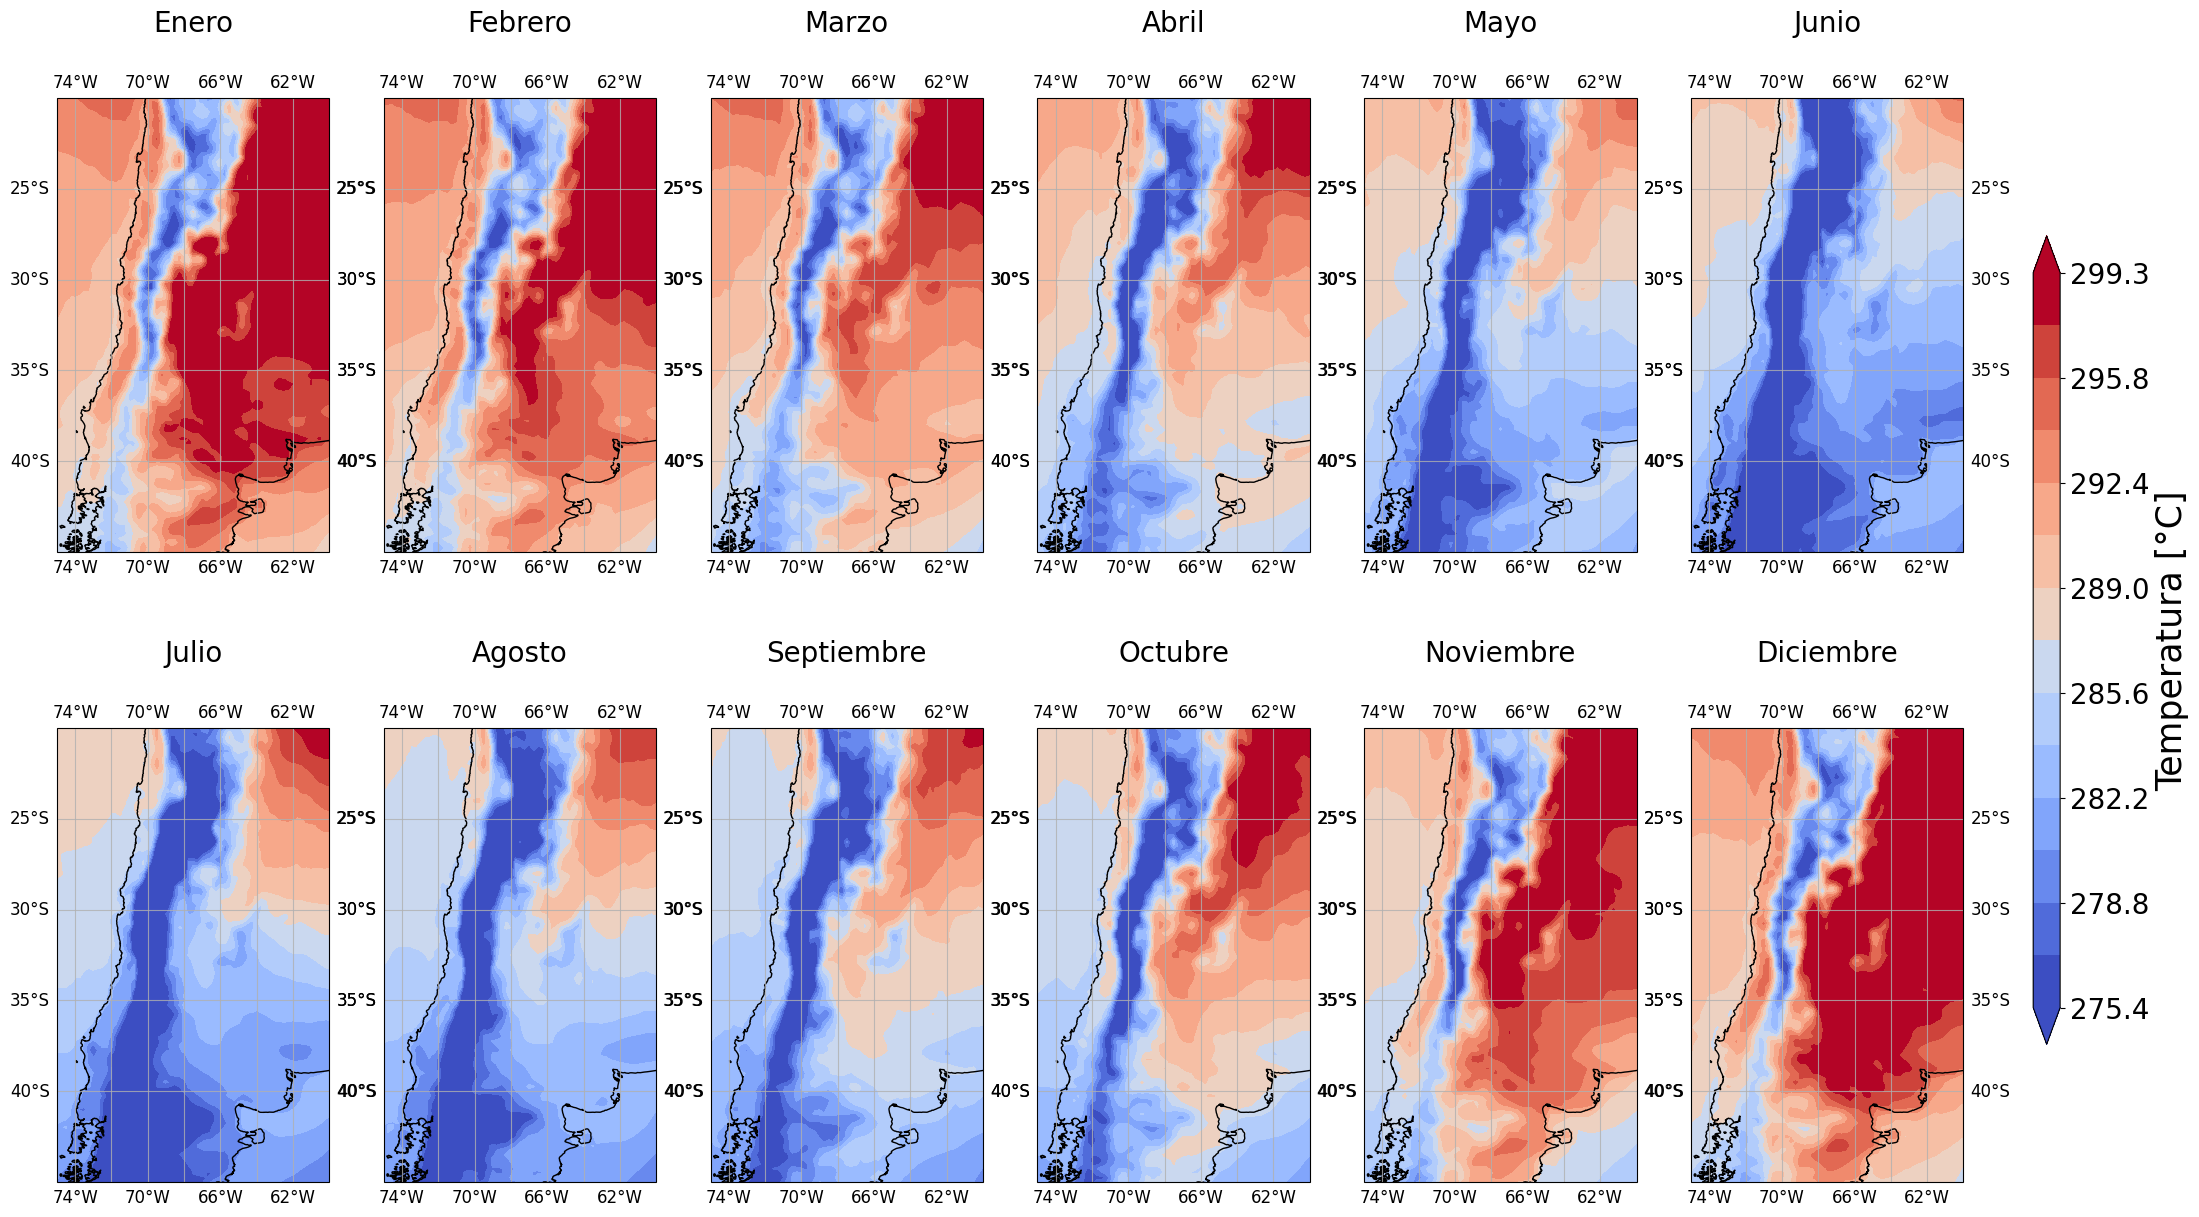

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import cartopy.feature as cfeature
from matplotlib.ticker import FuncFormatter
import cmaps as cmaps



months = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", 
          "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

def format_custom(x, pos):
   
    if x == 0:  
        return "0"
    elif abs(x) >= 1: 
        return "{:.1f}".format(x)
    elif abs(x) < 0.01:  
        return "{:.3f}".format(x)
    else:
        return "{:.2f}".format(x)
    
path = os.getcwd()
current_dir = os.path.abspath(path) 
data_dir = os.path.join(current_dir, "gridded_data", "ERA5", "processed", "mean")

    
fig, axs = plt.subplots(nrows = 2, ncols = 6, figsize=(30, 15), subplot_kw={'projection': ccrs.PlateCarree()})

axs = axs.flatten()
    
t2m_data_dir = os.path.join(data_dir, f"2m_temperature_monthly_mean.nc")
data_t2m = xr.open_dataset(t2m_data_dir, decode_times=True, decode_timedelta=True)

lat = data_u.latitude.values
lon = data_u.longitude.values
X, Y = np.meshgrid(lon, lat)

   


levels = [

        np.linspace( 
                    data_t2m["t2m"][:,:,:].quantile(0.05).values,
                    data_t2m["t2m"][:,:,:].quantile(0.95).values,
                    15
                    ),

    ]


for j in range(12):

    axs[j].set_extent([-75, -60, -45, -20], crs=ccrs.PlateCarree())

    resolution = '110m'
    category = 'physical'
    name = 'coastline'
    feature = cfeature.NaturalEarthFeature(category, name, resolution, edgecolor='black', facecolor='none')
    # axs.add_feature(feature)
    axs[j].coastlines()

    contour = axs[j].contourf(X, Y, data_t2m["t2m"][j,:,:],levels=levels[0], transform=ccrs.PlateCarree(), extend="both", cmap = cmaps.MPL_coolwarm.to_seg(N=15))

    axs[j].set_title(months[j], fontsize=20, pad=30)
        
    gl = axs[j].gridlines( draw_labels=True ,alpha=0.8)

    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}

cbar1 = fig.colorbar(contour, ax=axs[:], location='right', shrink=0.7, aspect=30, pad=0.03) 
cbar1.set_label(f"Temperatura [°C]", fontsize=25)
cbar1.ax.tick_params(  labelsize=20 )  
cbar1.formatter = FuncFormatter(format_custom)
cbar1.update_ticks()